In [ ]:
!pip install git+https://github.com/manmeet3591/xdownscale.git

  Cloning https://github.com/manmeet3591/xdownscale.git to /tmp/pip-req-build-peav7m9f
  Running command git clone --filter=blob:none --quiet https://github.com/manmeet3591/xdownscale.git /tmp/pip-req-build-peav7m9f
  Resolved https://github.com/manmeet3591/xdownscale.git to commit 3481d06e106f1ba36dc14d3f4f553e06cc557c9d
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ["WANDB_API_KEY"] = "70f85253c59220a4439123cc3c97280ece560bf5"

In [ ]:
import wandb
wandb.login()  # Prompts for API key securely

True

In [ ]:
import xarray as xr
import numpy as np
ds_dmsp = xr.open_dataset('/content/drive/MyDrive/ndui/dmsp_2012_austin.nc').constant[0,:600, :600]
ds_viirs = xr.open_dataset('/content/drive/MyDrive/ndui/viirs_2012_austin.nc').avg_rad[:600, :600]

In [ ]:
import xarray as xr
import numpy as np
from xdownscale import Downscaler

# Create dummy data for test
x = ds_viirs # np.random.rand(128, 128).astype(np.float32)
y = ds_dmsp #(x + np.random.normal(0, 0.01, size=x.shape)).astype(np.float32)

In [ ]:
x.shape

(600, 600)

In [ ]:
y.shape

(600, 600)

In [ ]:
input_da =  xr.DataArray(ds_viirs.values.astype(np.float32), dims=["lat", "lon"])
target_da = xr.DataArray(ds_dmsp.values.astype(np.float32), dims=["lat", "lon"])

# # Use FSRCNN instead of default SRCNN
# ds = Downscaler(input_da,
#                 target_da,
#                 model_name="fsrcnn",
#                 patch_size=32,
#                 epochs=100,
#                 val_split=0.2,
#                 test_split=0.1,)
# models = "srcnn", "fsrcnn", "carnm", "lapsr", "falsrb", "srresnet",
# "carn", "falsra", "oisrrk2", "mdsr", "san", "rcan", "unet", "dlgsanet",
# "dpmn", "safmn", "dpt", "distgssr", "swin"
ds = Downscaler(
    input_da, target_da,
    model_name="unet",
    patch_size=30,
    batch_size=16,
    epochs=100,
    val_split=0.2,
    test_split=0.1,
    device="cuda",
    use_wandb=True
)

[0] Train: 0.0519 | Val: 0.0556
[10] Train: 0.0140 | Val: 0.0118
[20] Train: 0.0069 | Val: 0.0094
[30] Train: 0.0054 | Val: 0.0094
[40] Train: 0.0047 | Val: 0.0051
[50] Train: 0.0047 | Val: 0.0040
[60] Train: 0.0055 | Val: 0.0064
[70] Train: 0.0040 | Val: 0.0042
[80] Train: 0.0037 | Val: 0.0038
[90] Train: 0.0041 | Val: 0.0051
[99] Train: 0.0032 | Val: 0.0035


epoch,▁▁▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇██
train_loss,███▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▃▃▃▂▂▂▁▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
epoch,99
train_loss,0.00324
val_loss,0.00346


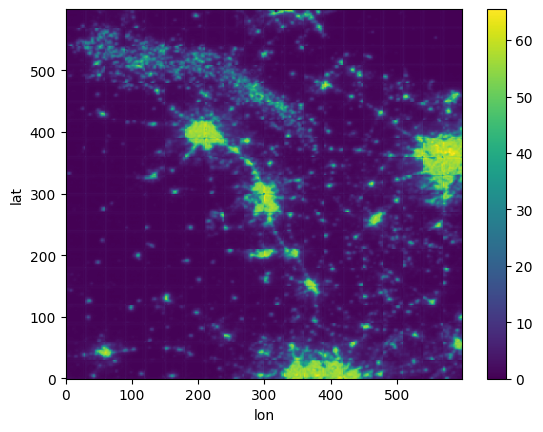

In [ ]:
# Predict on new input
result = ds.predict(input_da)
result.plot()

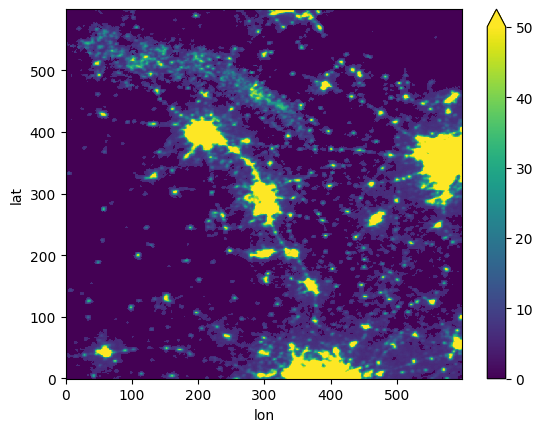

In [ ]:
target_da.plot(vmin=0, vmax=50)

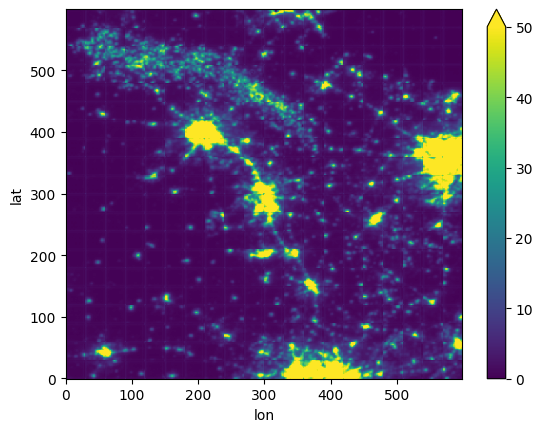

In [ ]:
result = ds.predict(input_da, use_patches=True)
result.plot(vmin=0, vmax=50)

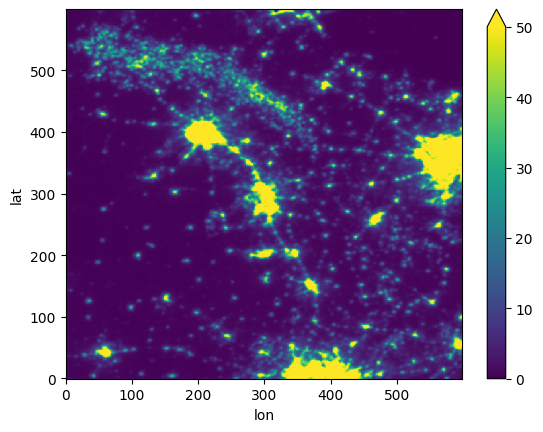

In [ ]:
result = ds.predict(input_da, use_patches=False)
result.plot(vmin=0, vmax=50)